In [1]:
# Data management
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as patches

# Data from Yahoo Finance
import yfinance as yf

# Warning cleaning
import warnings
warnings.filterwarnings('ignore')

# Data Acquisition

The acquisition of the data have been from 4 different open data platforms:
- INE. The Spanish Statistical Insitute. https://www.ine.es/dyngs/INEbase/en/listaoperaciones.htm 
- OECD. The Organization for Economic Cooperation and Development. https://data-explorer.oecd.org/?lc=en
- Eurostat. European platform that gathers data from the different european countries. https://ec.europa.eu/eurostat/databrowser/explore/all/all_themes?lang=en&display=list&sort=category
- Yahoo Finace: It has an import, that is in the previous cell

# Data Preprocess

Source: https://www.ine.es/jaxiPx/Tabla.htm?path=/t20/e245/p08/l0/&file=01003.px&L=1 (2022)

In [2]:
# Read the file
demographic_df = pd.read_csv('data_spain/Demographic_Population_Spain.csv', delimiter='\t')

# Drop useless columns
demographic_df = demographic_df.drop(columns=['Year','Spaniards/Foreigners'])

# Standard format and renaming columns
demographic_df['Age (year by year)'] = demographic_df['Age (year by year)'].str.extract('(\d+)').astype(int)
demographic_df.rename(columns={'Age (year by year)': 'Age'}, inplace=True)

# Group the data by age ranges of 5 years
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']
demographic_df['Age'] = pd.cut(demographic_df['Age'], bins=bins, labels=labels, right=False)

# Aggregate the data by age range and sex
demographic_df = demographic_df.groupby(['Age', 'Sex']).sum().reset_index()

# Convert 'Age' column to string
demographic_df['Age'] = demographic_df['Age'].astype(str)

demographic_df

,Age,Sex,Total
0,0-4,Females,754583
1,0-4,Males,797486
2,5-9,Females,954947
3,5-9,Males,1011052
4,10-14,Females,1101534
5,10-14,Males,1167943
6,15-19,Females,1085425
7,15-19,Males,1141393
8,20-24,Females,995110
9,20-24,Males,1050311


Source: https://ec.europa.eu/eurostat/databrowser/view/icw_tax_09/default/table?lang=en (2020)

In [3]:
# Read the file
taxes_distribution_df = pd.read_csv('data_eu/Distribution_taxes paid_gross_income_quintile.csv', delimiter=',')

# Droping useless columns and sorting
taxes_distribution_df = taxes_distribution_df[['geo','OBS_VALUE','quant_inc']]
taxes_distribution_df = taxes_distribution_df.sort_values(by=['geo','quant_inc'])

##### Spanish distribution taxes ######
taxes_distribution_Spain_df = taxes_distribution_df[taxes_distribution_df['geo'] == 'Spain']

# Changing values of quintiles
taxes_distribution_Spain_df = taxes_distribution_Spain_df.replace({'quant_inc': {'First quintile': '1st quintile', 'Second quintile': '2nd quintile', 'Third quintile': '3rd quintile', 'Fourth quintile': '4th quintile', 'Fifth quintile': '5th quintile'}})

# Renaming columns
taxes_distribution_Spain_df = taxes_distribution_Spain_df.rename(columns={'OBS_VALUE': 'Taxes%_gross_income (first quintile)', 'quant_inc': 'Income Quintile'})

# Drop column 'geo' from Spain_df
taxes_distribution_Spain_df = taxes_distribution_Spain_df.drop(columns=['geo'])

# Renaming columns on the geral dataframe
taxes_distribution_EU_df = taxes_distribution_df.rename(columns={'geo': 'Country', 'OBS_VALUE': 'Taxes%_gross_income (first quintile)', 'quant_inc': 'Income Quintile'})

# Filter to have only 'First quintile' and drop column 'Income Quintile'
taxes_distribution_EU_df = taxes_distribution_EU_df[taxes_distribution_EU_df['Income Quintile'] == 'First quintile']
taxes_distribution_EU_df = taxes_distribution_EU_df.drop(columns=['Income Quintile'])

##### We have two dataframes: 'taxes_distribution_df' and 'taxes_distribution_Spain_df' #####
taxes_distribution_EU_df

,Country,Taxes%_gross_income (first quintile)
0,Belgium,17.2
1,Czechia,11.3
4,France,22.2
2,Germany,23.3
5,Netherlands,26.9
6,Poland,25.2
7,Portugal,19.9
3,Spain,28.4
8,Sweden,36.0


Source: https://ec.europa.eu/eurostat/databrowser/view/icw_tax_09/default/table?lang=en (2020)

In [4]:
# Read the file
expediture_pensions_df = pd.read_csv('data_eu/Expediture_pensions_GDP_EU.csv', delimiter=',')

# Droping useless columns
expediture_pensions_df = expediture_pensions_df[['geo','OBS_VALUE']]

# Renaming columns
expediture_pensions_df = expediture_pensions_df.rename(columns={'geo': 'Country', 'OBS_VALUE': 'Pensions%_GDP'})

# Change Europe Union vaue
expediture_pensions_df = expediture_pensions_df.replace('European Union - 27 countries (from 2020)', 'European Union (mean)')

expediture_pensions_df

,Country,Pensions%_GDP
0,Belgium,12.62
1,Czechia,8.63
2,Germany,12.00
3,Spain,13.77
4,European Union (mean),12.77
5,France,14.86
6,Italy,16.19
7,Netherlands,11.84
8,Poland,10.85
9,Portugal,14.16


Source: https://ec.europa.eu/eurostat/databrowser/view/tessi190/default/table?lang=en (2023)

In [5]:
# Read the file
gini_EU_df = pd.read_csv('data_eu/GINI_EU.csv', delimiter=',')

# Droping useless columns
gini_EU_df = gini_EU_df[['geo','OBS_VALUE']]

# Renaming columns
gini_EU_df = gini_EU_df.rename(columns={'geo': 'Country', 'OBS_VALUE': 'GINI_coefficient'})

# Renaming Europe Union value
gini_EU_df = gini_EU_df.replace('European Union - 27 countries (from 2020)', 'European Union (mean)')

gini_EU_df

,Country,GINI_coefficient
0,Belgium,24.2
1,Czechia,24.4
2,Germany,29.4
3,Spain,31.5
4,European Union (mean),29.6
5,France,29.7
6,Italy,31.5
7,Netherlands,26.5
8,Poland,27.0
9,Portugal,33.7


Source: https://data-explorer.oecd.org/vis?fs[0]=Topic%2C1%7CFinance%20and%20investment%23FIN%23%7CPensions%20and%20insurance%23FIN_PIN%23&fs[1]=Topic%2C2%7CFinance%20and%20investment%23FIN%23%7CPensions%20and%20insurance%23FIN_PIN%23%7CPensions%23FIN_PIN_PEN%23&pg=0&fc=Topic&snb=13&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PRR&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=DEU%2BNLD%2BCZE%2BPOL%2BEU27%2BBEL%2BFRA%2BPRT%2BSWE%2BITA%2BESP.A.GPRR100%2BNPRR100.PT_EARN_G_PRE_RET_INC...M&pd=2022%2C2022&to[TIME_PERIOD]=true&vw=tb (2022)

In [6]:
# Read the file
pension_replacement_EU_df = pd.read_csv('data_eu/Pension_Replacement_Rates_EU.csv', delimiter=',')

# Droping useless columns
pension_replacement_EU_df = pension_replacement_EU_df[['Reference area','OBS_VALUE']]

# Mean per country, because we have two values per country (male and female)
pension_replacement_EU_df = pension_replacement_EU_df.groupby('Reference area').mean().reset_index()

# Renaming columns
pension_replacement_EU_df = pension_replacement_EU_df.rename(columns={'Reference area': 'Country', 'OBS_VALUE': 'Pension_replacement_rate'})

# Renaming Europe Union value
pension_replacement_EU_df = pension_replacement_EU_df.replace('European Union (27 countries)', 'European Union (mean)')

pension_replacement_EU_df

,Country,Pension_replacement_rate
0,Belgium,43.50
1,Czechia,47.40
2,European Union (mean),54.55
3,France,57.60
4,Germany,43.90
5,Italy,76.10
6,Netherlands,74.70
7,Poland,26.10
8,Portugal,73.90
9,Spain,80.40


Source: https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateArchiveDMZ&df[id]=DF_DP_LIVE&df[ag]=OECD&df[vs]=&av=false&pd=2022%2C&dq=SWE%2BPRT%2BCZE%2BBEL%2BNLD%2BEU27_2020%2BPOL%2BFRA%2BESP%2BITA%2BDEU.YOUTHUNEMP...A&to[TIME_PERIOD]=false&vw=tb (2022)

In [7]:
# Read the file
youth_unemployment_EU_df = pd.read_csv('data_eu/Youth_Unemployment_UE.csv', delimiter=',')

# Droping useless columns
youth_unemployment_EU_df = youth_unemployment_EU_df[['Country','OBS_VALUE']]

# Mean per country, because we have two values per country (male and female)
youth_unemployment_EU_df = youth_unemployment_EU_df.groupby('Country').mean().reset_index()

# Renaming columns
youth_unemployment_EU_df = youth_unemployment_EU_df.rename(columns={'OBS_VALUE': 'Youth_unemployment_rate'})

# Renaming Europe Union value
youth_unemployment_EU_df = youth_unemployment_EU_df.replace('European Union – 27 countries (from 01/02/2020)', 'European Union (mean)')

# Standard format
youth_unemployment_EU_df['Youth_unemployment_rate'] = youth_unemployment_EU_df['Youth_unemployment_rate'].round(2)

youth_unemployment_EU_df

,Country,Youth_unemployment_rate
0,Belgium,16.20
1,Czechia,7.77
2,European Union (mean),14.50
3,France,17.19
4,Germany,5.86
5,Italy,24.09
6,Netherlands,7.63
7,Poland,10.84
8,Portugal,19.30
9,Spain,29.78


In [8]:
###### Merge all dataframes into one single dataframe ######
EU_df = expediture_pensions_df.merge(gini_EU_df, on='Country', how='outer') \
                                  .merge(pension_replacement_EU_df, on='Country', how='outer') \
                                  .merge(taxes_distribution_EU_df, on='Country', how='outer') \
                                  .merge(youth_unemployment_EU_df, on='Country', how='outer')

EU_df

,Country,Pensions%_GDP,GINI_coefficient,Pension_replacement_rate,Taxes%_gross_income (first quintile),Youth_unemployment_rate
0,Belgium,12.62,24.2,43.50,17.2,16.20
1,Czechia,8.63,24.4,47.40,11.3,7.77
2,European Union (mean),12.77,29.6,54.55,NaN,14.50
3,France,14.86,29.7,57.60,22.2,17.19
4,Germany,12.00,29.4,43.90,23.3,5.86
5,Italy,16.19,31.5,76.10,NaN,24.09
6,Netherlands,11.84,26.5,74.70,26.9,7.63
7,Poland,10.85,27.0,26.10,25.2,10.84
8,Portugal,14.16,33.7,73.90,19.9,19.30
9,Spain,13.77,31.5,80.40,28.4,29.78


Source: https://www.ine.es/jaxiT3/Tabla.htm?t=9942&L=1 (2023)

In [9]:
# Read the file
income_ages_spain_df = pd.read_csv('data_spain/Income_Ages_Spain.csv', delimiter=';')

# Droping useless columns
income_ages_spain_df = income_ages_spain_df[['Age','Total']]

# Renaming column
income_ages_spain_df = income_ages_spain_df.rename(columns={'Total': 'Average_annual_income'})

# Standard format of column 'Age'
income_ages_spain_df['Age'] = income_ages_spain_df['Age'].str.replace(' to ', '-').str.replace(' and over', '+').str.replace(' years old', '').str.replace(' years', '').str.replace('From ', '')

income_ages_spain_df

,Age,Average_annual_income
0,16-29,"14,328"
1,30-44,"15,782"
2,45-64,"17,475"
3,65+,"19,639"


Source: https://www.ine.es/jaxiT3/Tabla.htm?t=9958&L=1 (2023)

In [10]:
# Read the file
poverty_rate_spain_df = pd.read_csv('data_spain/Poverty_Rates_Age_Spain.csv', delimiter=';')

# Droping useless columns
poverty_rate_spain_df = poverty_rate_spain_df[['Age','Total']]

# Renaming column
poverty_rate_spain_df = poverty_rate_spain_df.rename(columns={'Total': 'Poverty_rate'})

# Standard format of column 'Age'
poverty_rate_spain_df['Age'] = poverty_rate_spain_df['Age'].str.replace(' to ', '-').str.replace(' and over', '+').str.replace(' years old', '').str.replace(' years', '').str.replace('From ', '')

poverty_rate_spain_df

,Age,Poverty_rate
0,16-29,20.1
1,30-44,18.5
2,45-64,14.6
3,65+,10.2


Source: https://www.ine.es/jaxiT3/Tabla.htm?t=9958&L=1 (2023)

In [11]:
# read the csv file
severance_payment_spain_df = pd.read_csv('data_spain/Severance_Payment_Age_Spain.csv', delimiter='\t')

# Droping useless columns
severance_payment_spain_df = severance_payment_spain_df[['Age','Total']]

# Renaming column
severance_payment_spain_df = severance_payment_spain_df.rename(columns={'Total': 'Severance_payment'})

# Standard format of column 'Age'
severance_payment_spain_df['Age'] = severance_payment_spain_df['Age'].str.replace(' to ', '-').str.replace(' and over', '+').str.replace(' years old', '').str.replace(' years', '').str.replace('From ', '')

severance_payment_spain_df

,Age,Severance_payment
0,16-29,997.4
1,30-44,5169.7
2,45-64,9539.9
3,65+,16784.2


In [12]:
# Merge all dataframes from Spain into one single dataframe
Spain_df = income_ages_spain_df.merge(poverty_rate_spain_df, on='Age', how='outer') \
                              .merge(severance_payment_spain_df, on='Age', how='outer') \

# Convert 'Average_annual_income' to numeric if it is not already
if Spain_df['Average_annual_income'].dtype == 'object':
    Spain_df['Average_annual_income'] = Spain_df['Average_annual_income'].str.replace(',', '').astype(float)

##### Final Spain_df #####
Spain_df

,Age,Average_annual_income,Poverty_rate,Severance_payment
0,16-29,14328.0,20.1,997.4
1,30-44,15782.0,18.5,5169.7
2,45-64,17475.0,14.6,9539.9
3,65+,19639.0,10.2,16784.2


Source: https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateArchiveDMZ&df[id]=DF_DP_LIVE&df[ag]=OECD&df[vs]=&av=true&pd=2010%2C2022&dq=ESP.TEMPEMP.25_54%2B15_24..A&to[TIME_PERIOD]=false&vw=tb

In [13]:
# Read file
temporary_rate_spain_df = pd.read_csv('data_spain/Temporary_rate_Spain.csv', delimiter=',')

# Droping useless columns
temporary_rate_spain_df = temporary_rate_spain_df[['TIME_PERIOD','Subject','OBS_VALUE']]

# Renaming column
temporary_rate_spain_df = temporary_rate_spain_df.rename(columns={'TIME_PERIOD': 'Year', 'Subject': 'Age_range', 'OBS_VALUE': 'Temporary_rate_value'})

# Sorting by 'Year'
temporary_rate_spain_df = temporary_rate_spain_df.sort_values(by='Year')

temporary_rate_spain_df

,Year,Age_range,Temporary_rate_value
2,2010,15-24 year-olds,58.43
12,2010,25-54 year-olds,23.62
3,2011,15-24 year-olds,61.17
23,2011,25-54 year-olds,24.36
21,2012,15-24 year-olds,62.18
13,2012,25-54 year-olds,22.88
0,2013,15-24 year-olds,64.69
16,2013,25-54 year-olds,22.71
6,2014,25-54 year-olds,23.64
15,2014,15-24 year-olds,69.13


Source: Yahoo Finance import

In [14]:
# Download data from iShares MSCI Norway ETF (ticker: ENOR) replicates the Sovereign Fund of Norway
enor = yf.Ticker("ENOR")
enor_hist_df = enor.history(period="10y")

# Reset index
enor_hist_df.reset_index(inplace=True)

# Drop useless columns
enor_hist_df = enor_hist_df[['Date', 'Close']]

# Stardard Date format
enor_hist_df['Date'] = enor_hist_df['Date'].dt.strftime('%Y-%m-%d')

enor_hist_df

,Date,Close
0,2015-03-02,16.905327
1,2015-03-03,16.926622
2,2015-03-04,16.621441
3,2015-03-05,16.869843
4,2015-03-06,16.458212
...,...,...
2511,2025-02-24,24.020000
2512,2025-02-25,24.120001
2513,2025-02-26,23.900000
2514,2025-02-27,23.580000


Source: https://www.ine.es/jaxiPx/Tabla.htm?file=01005.px&path=%2Ft20%2Fp85001%2Fserie%2Fl0%2F&L=1

In [15]:
# Read file
timeline_emigrants_spain_df = pd.read_csv('data_spain/Spanish_Outside_Population.csv', delimiter=';')

# Droping useless columns
timeline_emigrants_spain_df = timeline_emigrants_spain_df[['year','Total']]

# Renaming column
timeline_emigrants_spain_df = timeline_emigrants_spain_df.rename(columns={'Total': 'Total_emigrants', 'year': 'Year'})

# Convert 'Total_emigrants' to numeric
timeline_emigrants_spain_df['Total_emigrants'] = timeline_emigrants_spain_df['Total_emigrants'].str.replace(',', '').astype(int)

# New column of the variation from the previous year
timeline_emigrants_spain_df = timeline_emigrants_spain_df.sort_values(by='Year', ascending=True)
timeline_emigrants_spain_df['Variation (%)'] = timeline_emigrants_spain_df['Total_emigrants'].pct_change() * 100
timeline_emigrants_spain_df['Variation (%)'] = timeline_emigrants_spain_df['Variation (%)'].round(2)

timeline_emigrants_spain_df

,Year,Total_emigrants,Variation (%)
15,2009,1471691,NaN
14,2010,1574123,6.96
13,2011,1702778,8.17
12,2012,1816835,6.70
11,2013,1931248,6.30
10,2014,2058048,6.57
9,2015,2183043,6.07
8,2016,2305030,5.59
7,2017,2406611,4.41
6,2018,2482808,3.17


## Resume of DataFrames

- EU_df -> Data from the top 10 most populated countries in Europe
- Spain_df -> Data from Spain classified by range of ages
- taxes_distribution_Spain_df -> Distrbituion by quintiles of % of Taxes each quintile pays based of its Gross Income
- temporary_rate_spain_df -> Time evolution of temporary rates by range of ages
- enor_hist_df -> Time evolution of ENOR ETF. ETF that replicates the moves of Norwegian Sovereign Fund
- timeline_emigrants_spain_df -> Time evolution of number of spaniard emigrants

# Plots and figures

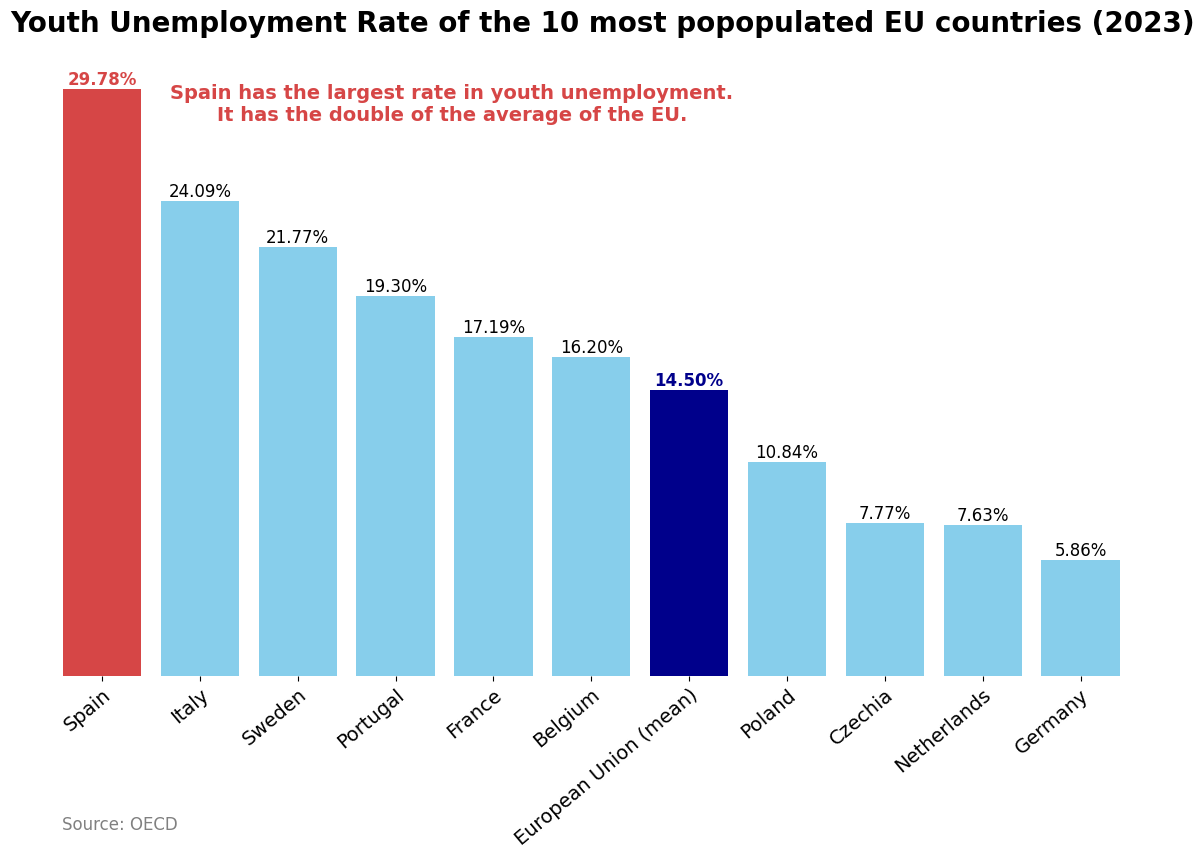

In [16]:
# Sorting by 'Country'
EU_df = EU_df.sort_values(by='Youth_unemployment_rate', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(EU_df['Country'], EU_df['Youth_unemployment_rate'], 
               color=['#d64646' if country == 'Spain' else 'darkblue' if country == 'European Union (mean)' else 'skyblue' for country in EU_df['Country']])

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    country = bar.get_x() + bar.get_width() / 2
    country_name = EU_df.iloc[int(country)].Country
    # Highligh Spain and EU bars
    if country_name == 'Spain':
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#d64646')
    elif country_name == 'European Union (mean)':
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkblue')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# Add x-axis labels and title
plt.xticks(rotation=40, ha='right', rotation_mode='anchor', fontsize=14, position=(0.5, 0))
plt.title('Youth Unemployment Rate of the 10 most popopulated EU countries (2023)', fontsize=20, pad=20, loc='left', fontweight='bold', color='black')

# Add explaning annotation
plt.annotate('Spain has the largest rate in youth unemployment.\nIt has the double of the average of the EU.', 
             xy=(0.38, 0.90), xycoords='axes fraction', ha='center', fontsize=14, fontweight='bold', color='#d64646')

# Add source annotation
plt.annotate('Source: OECD', xy=(0.045, -0.25), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Remove the frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove y-axis
plt.gca().get_yaxis().set_visible(False)

plt.show()

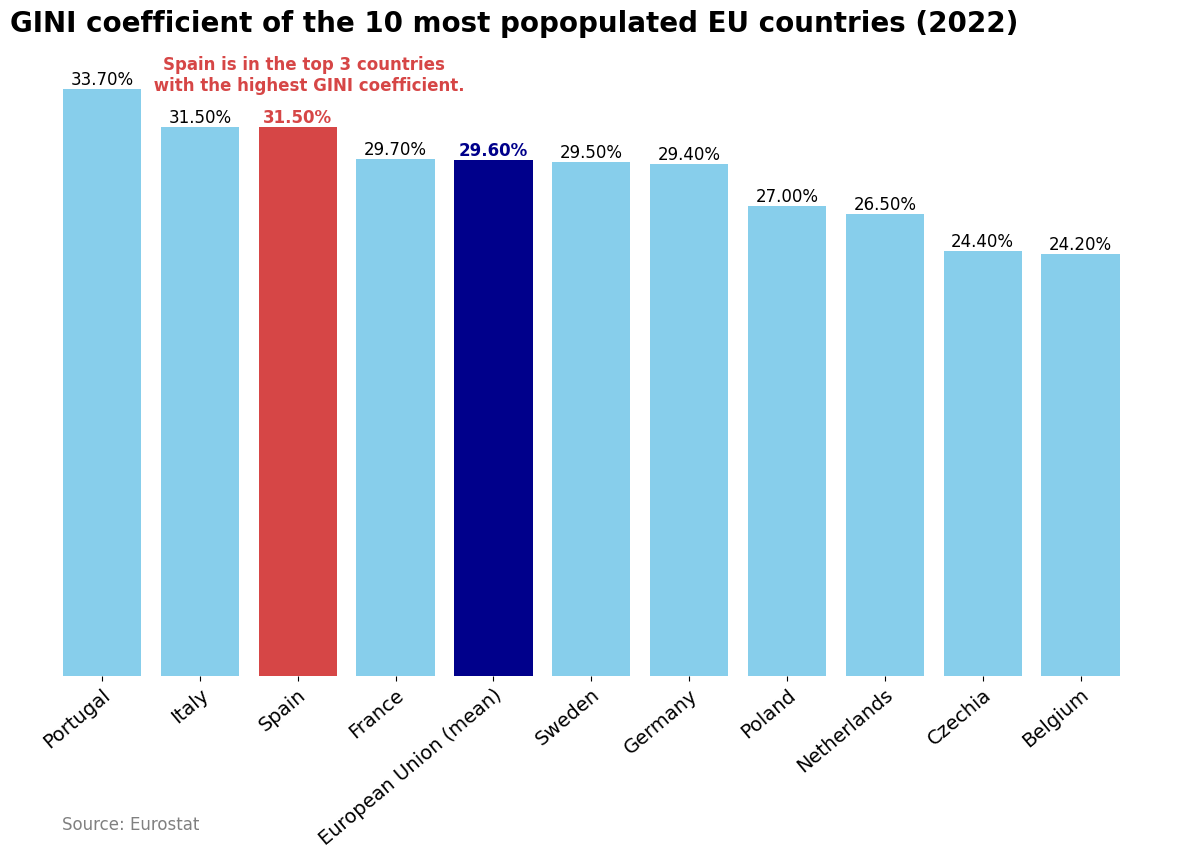

In [17]:
# Sorting by 'GINI'
EU_df = EU_df.sort_values(by='GINI_coefficient', ascending=False)

# Plot the unemployment rate mean as a bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(EU_df['Country'], EU_df['GINI_coefficient'], 
               color=['#d64646' if country == 'Spain' else 'darkblue' if country == 'European Union (mean)' else 'skyblue' for country in EU_df['Country']])

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    country = bar.get_x() + bar.get_width() / 2
    country_name = EU_df.iloc[int(country)].Country
    # Highligh Spain and EU bars
    if country_name == 'Spain':
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#d64646')
    elif country_name == 'European Union (mean)':
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkblue')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# Add x-axis labels and title
plt.xticks(rotation=40, ha='right', rotation_mode='anchor', fontsize=14, position=(0.5, 0))
plt.title('GINI coefficient of the 10 most popopulated EU countries (2022)', fontsize=20, pad=20, loc='left', fontweight='bold')

# Add explaning annotation
plt.annotate('Spain is in the top 3 countries \n with the highest GINI coefficient.', 
             xy=(0.255, 0.95), xycoords='axes fraction', ha='center', fontsize=12, fontweight='bold', color='#d64646')

# Add source annotation
plt.annotate('Source: Eurostat', xy=(0.045, -0.25), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Remove the frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove y-axis
plt.gca().get_yaxis().set_visible(False)

# Show the plot
plt.show()

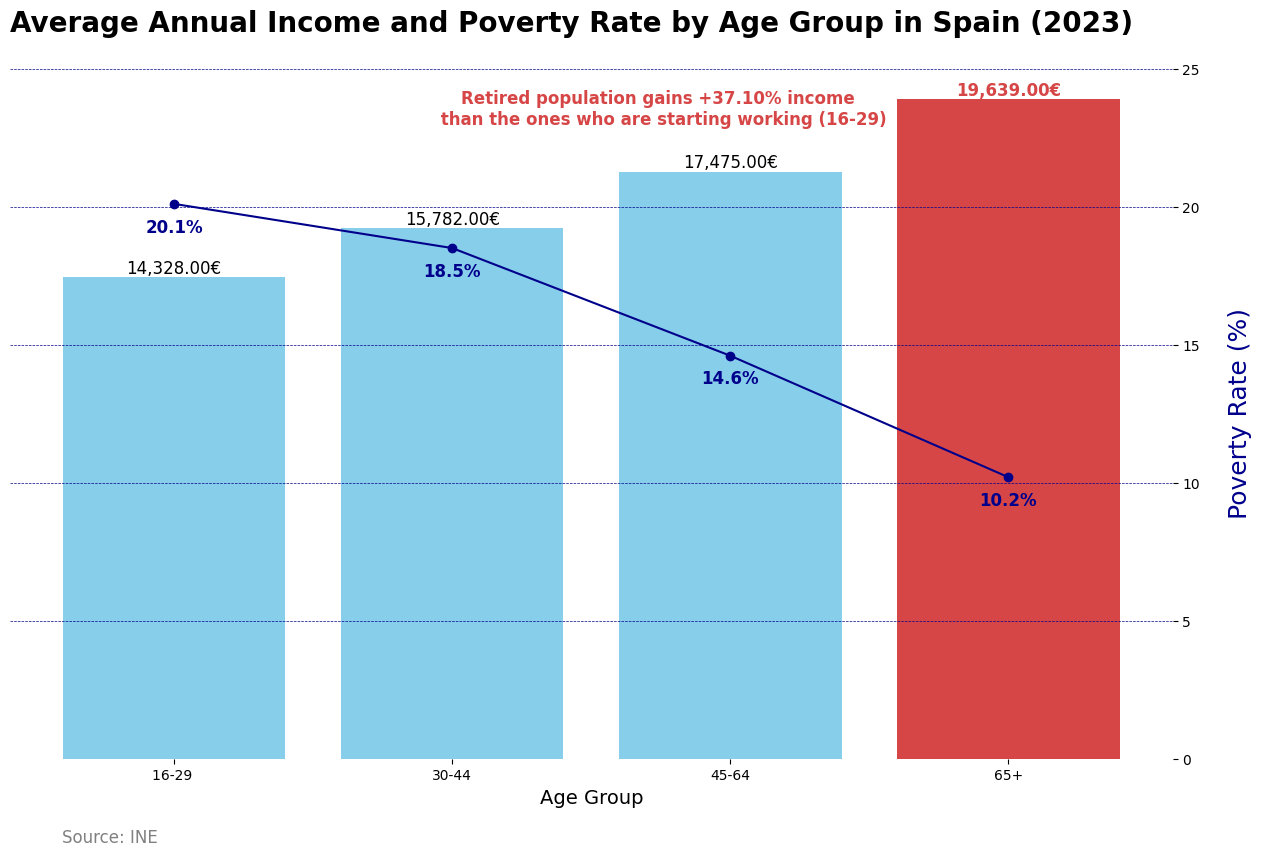

In [18]:
# Create figure and subplots
fig, ax1 = plt.subplots(figsize=(15, 9))

# Plot 'Average_annual_income' as bar chart
bars1 = ax1.bar(Spain_df['Age'], Spain_df['Average_annual_income'], 
                color=['#d64646' if age == '65+' else 'skyblue' for age in Spain_df['Age']], 
                label='Average Annual Income')

# Add labels on top of each bar
for bar in bars1:
    height = bar.get_height()
    age_group = Spain_df.iloc[int(bar.get_x() + bar.get_width() / 2)].Age
    color = '#d64646' if age_group == '65+' else 'black'
    fontweight = 'bold' if age_group == '65+' else 'normal'
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.2f}€', ha='center', va='bottom', fontsize=12, fontweight=fontweight, color=color)

# Create a second y-axis to plot 'Poverty_rate'
ax2 = ax1.twinx()
bars2 = ax2.plot(Spain_df['Age'], Spain_df['Poverty_rate'], color='darkblue', marker='o', label='Poverty Rate')

# Add labels on top of per each point
for i, txt in enumerate(Spain_df['Poverty_rate']):
    ax2.text(i, txt - 0.5, f'{txt:.1f}%', ha='center', va='top', fontsize=12, fontweight='bold', color='darkblue')

# Set the y-axis limit for ax2 to start from 0
ax2.set_ylim(0, max(Spain_df['Poverty_rate']) + 5)

# Add labels and title
ax1.set_xlabel('Age Group', fontsize=14)
ax2.set_ylabel('Poverty Rate (%)', fontsize=18, color='darkblue', labelpad=20)
plt.title('Average Annual Income and Poverty Rate by Age Group in Spain (2023)', fontsize=20, loc='left', pad=25, fontweight='bold', color='black')

# Add explaning annotation 
plt.annotate('Retired population gains +37.10% income \n than the ones who are starting working (16-29)', 
             xy=(1.75, 23),
             fontsize=12, fontweight='bold', color='#d64646', ha='center')

# Add source annotation
plt.annotate('Source: INE', xy=(0.045, -0.12), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Add grid with to the poverty rate axis
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='darkblue', alpha=1)

# Remove the frame around the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Remove y-axis for ax1
ax1.get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [19]:
# Calculate total retired population
total_retired = demographic_df[((demographic_df['Age'] >= '55') | (demographic_df['Age'] == '100+'))]['Total'].sum()
total_retired

# Calculate percentage of retired population
percentage_retired = (total_retired / demographic_df['Total'].sum()) * 100
percentage_retired

np.float64(36.13478885393111)

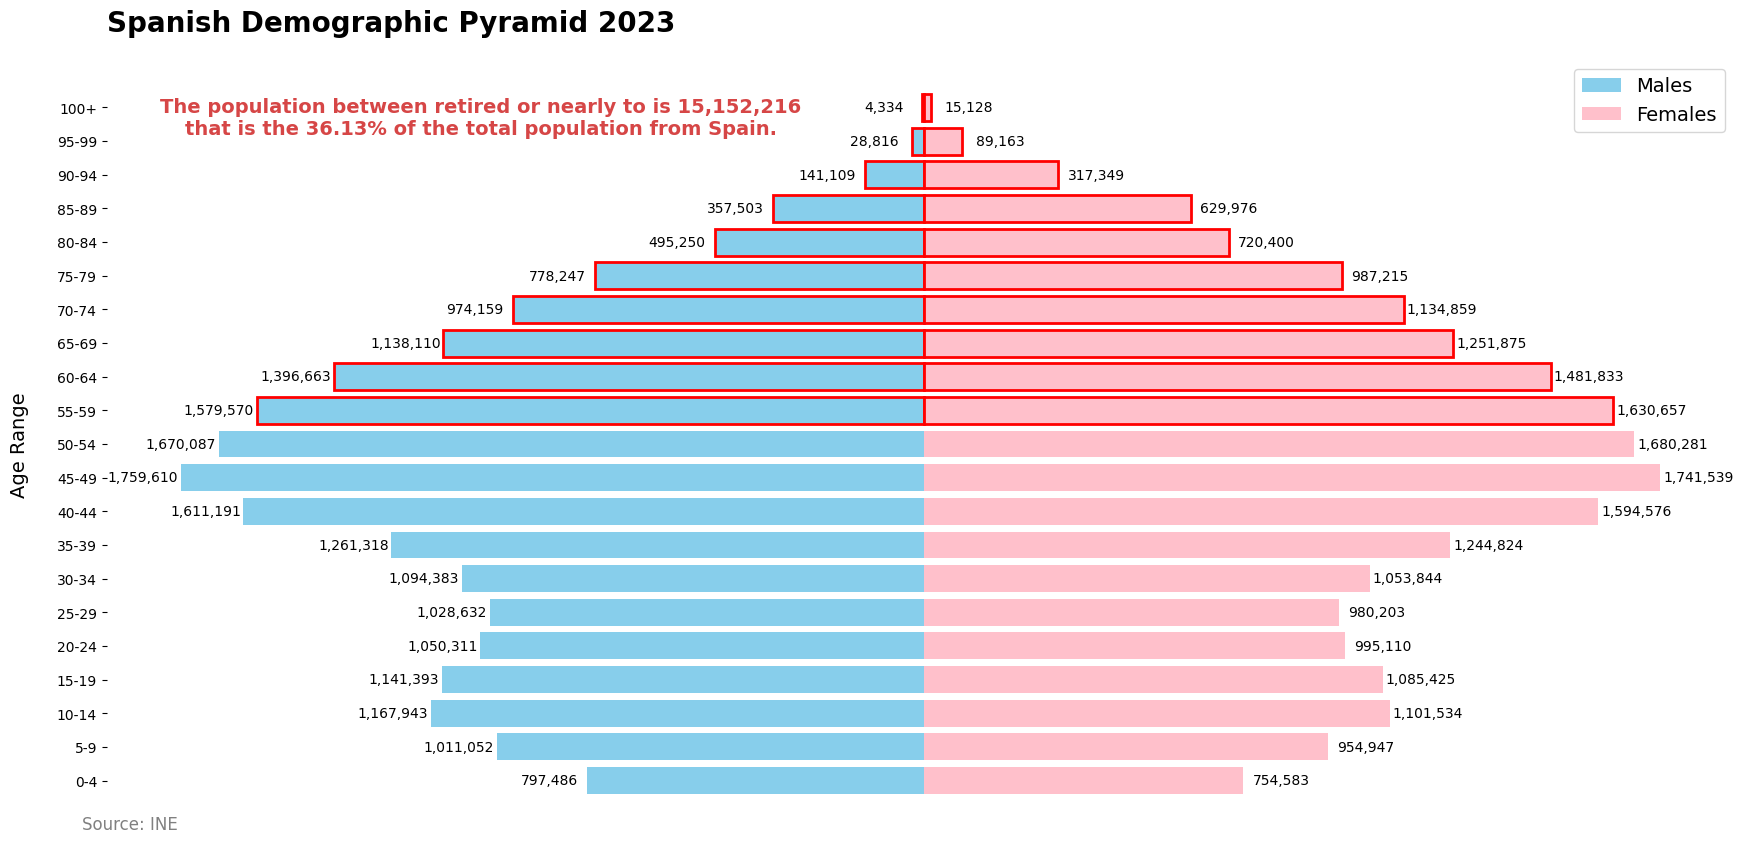

In [20]:
# Highlight the range of +55 years
highlight = demographic_df[((demographic_df['Age'] >= '55-59') | (demographic_df['Age'] == '100+'))]

# Function to create a new format for the numbers
def thousands_formatter(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

# PLting the demographic pyramid
fig, ax = plt.subplots(figsize=(21, 10))

# Bars of male population at the left side
bars_males = ax.barh(demographic_df[demographic_df['Sex'] == 'Males']['Age'], 
    -demographic_df[demographic_df['Sex'] == 'Males']['Total'], 
    color='skyblue', 
    edgecolor=['red' if age in highlight['Age'].values else 'none' for age in demographic_df[demographic_df['Sex'] == 'Males']['Age']], 
    linewidth=2,
    label='Males')

# Bars of female population at the right side
bars_females = ax.barh(demographic_df[demographic_df['Sex'] == 'Females']['Age'], 
    demographic_df[demographic_df['Sex'] == 'Females']['Total'], 
    color='pink', 
    edgecolor=['red' if age in highlight['Age'].values else 'none' for age in demographic_df[demographic_df['Sex'] == 'Females']['Age']], 
    linewidth=2,
    label='Females')

# Add values next to the bars
for bar in bars_males:
    width = bar.get_width()
    ax.text(width - 90000, bar.get_y() + bar.get_height() / 2, f'{abs(width):,.0f}'.replace(',', ','), ha='center', va='center', color='black')

for bar in bars_females:
    width = bar.get_width()
    ax.text(width + 90000, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}'.replace(',', ','), ha='center', va='center', color='black')

# Title and legend
ax.set_ylabel('Age Range', fontsize=14, labelpad=20)
ax.set_title('Spanish Demographic Pyramid 2023', fontsize=20, fontweight='bold', loc='left', pad=20)
ax.legend(fontsize=14)

# Explaining annotation
text_str = f'The population between retired or nearly to is {total_retired:,}\nthat is the {percentage_retired:.2f}% of the total population from Spain.'
plt.text(0.23, 0.95, text_str, transform=ax.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='center', color='#d64646', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Source annotation
plt.annotate('Source: INE', xy=(-0.015, -0.00), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Configure the format del eje of numbers
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Remove the frame around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove z-axis
ax.get_xaxis().set_visible(False)

plt.show()

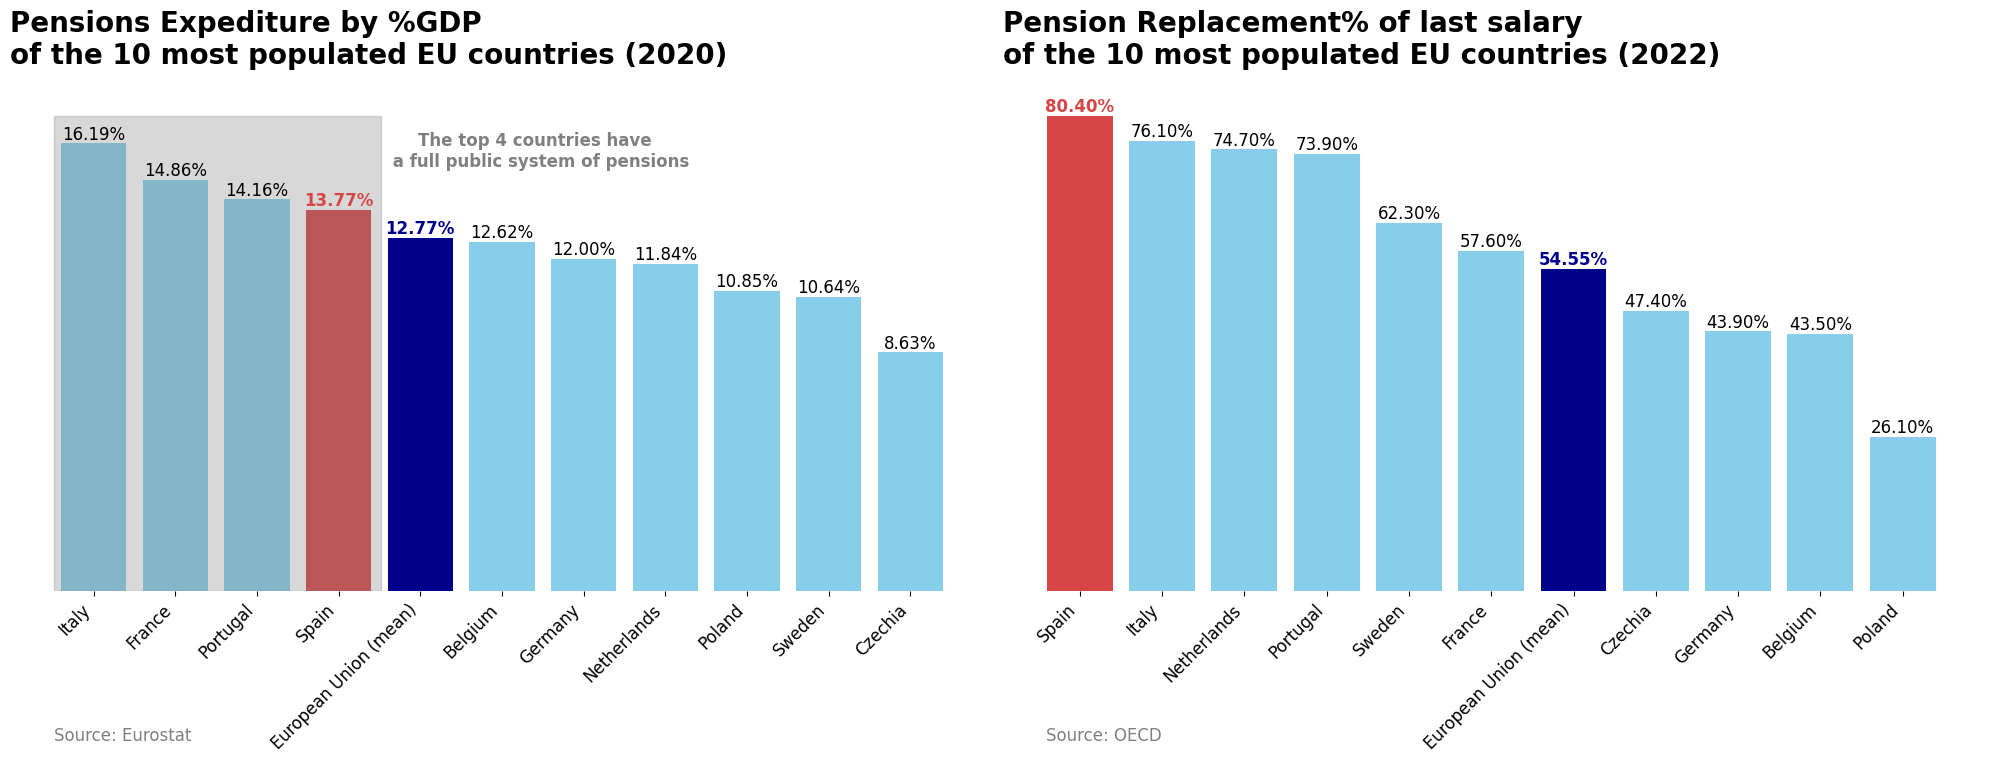

In [21]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

##### 1st subplot #####

# Sort by 'Pensions%_GDP'
EU_df = EU_df.sort_values(by='Pensions%_GDP', ascending=False)

# Plot 'Pensions%_GDP' as a bar chart on the first subplot
bars1 = ax1.bar(EU_df['Country'], EU_df['Pensions%_GDP'], 
                color=['#d64646' if country == 'Spain' else 'darkblue' if country == 'European Union (mean)' else 'skyblue' for country in EU_df['Country']], 
                label='Pensions% GDP')

# Add labels each bar 'Pensions%_GDP'
for bar in bars1:
    height = bar.get_height()
    country_name = EU_df.iloc[int(bar.get_x() + bar.get_width() / 2)].Country
    # Highligh Spain and EU bars
    if country_name == 'Spain':
        color = '#d64646'
        fontweight = 'bold'
    elif country_name == 'European Union (mean)':
        color = 'darkblue'
        fontweight = 'bold'
    else:
        color = 'black'
        fontweight = 'normal'
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight=fontweight, color=color)

# Labels and title for the 1st subplot
ax1.set_title('Pensions Expediture by %GDP \nof the 10 most populated EU countries (2020)', fontsize=20, pad=20, fontweight='bold', loc='left')
ax1.set_xticklabels(EU_df['Country'], rotation=45, ha='right', fontsize=12)

# Remove the frame around the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Add annotation next to the enclosure
ax1.annotate('The top 4 countries have \n a full public system of pensions', 
             xy=(0.54, 0.85), xycoords='axes fraction', ha='center', fontsize=12, fontweight='bold', color='gray')

# Source annotation
ax1.annotate('Source: Eurostat', xy=(0.045, -0.30), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Remove y-axis for the first subplot
ax1.get_yaxis().set_visible(False)

# Add enclosure for the first 4 bars
rect = patches.Rectangle((bars1[0].get_x() -0.1 * bars1[0].get_width(), 0), 
                         5 * bars1[0].get_width(), max(EU_df['Pensions%_GDP']) + 1, 
                         linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.3)
ax1.add_patch(rect)

##### 2nd subplot #####

# Sort by 'Pension_replacement_rate'
EU_df = EU_df.sort_values(by='Pension_replacement_rate', ascending=False)

# Plot 'Pension_replacement_rate' as a bar chart on the second subplot
bars2 = ax2.bar(EU_df['Country'], EU_df['Pension_replacement_rate'], 
                color=['#d64646' if country == 'Spain' else 'darkblue' if country == 'European Union (mean)' else 'skyblue' for country in EU_df['Country']], 
                label='Pension Replacement% of last salary of the 10 most populated EU countries')

# Add labels on top of each bar for 'Pension_replacement_rate'
for bar in bars2:
    height = bar.get_height()
    country_name = EU_df.iloc[int(bar.get_x() + bar.get_width() / 2)].Country
    # Highligh Spain and EU bars
    if country_name == 'Spain':
        color = '#d64646'
        fontweight = 'bold'
    elif country_name == 'European Union (mean)':
        color = 'darkblue'
        fontweight = 'bold'
    else:
        color = 'black'
        fontweight = 'normal'
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight=fontweight, color=color)

# Add labels and title
ax2.set_title('Pension Replacement% of last salary \nof the 10 most populated EU countries (2022)', fontsize=20, pad=20, fontweight='bold', loc='left')
ax2.set_xticklabels(EU_df['Country'], rotation=45, ha='right', fontsize=12)

# Source annotation
plt.annotate('Source: OECD', xy=(0.045, -0.30), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Remove y-axis for the second subplot
ax2.get_yaxis().set_visible(False)

# Remove the frame around the plot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

In [22]:
# Sorting Spain_df by 'Income Quintile'
taxes_distribution_Spain_df = taxes_distribution_Spain_df.sort_values(by='Income Quintile', ascending=True)

# Sorting EU_df by 'Income Quintile'
taxes_distribution_EU_df = taxes_distribution_EU_df.sort_values(by='Taxes%_gross_income (first quintile)', ascending=True)

# Mean of Sweden
mean_sweden = taxes_distribution_df[taxes_distribution_df['geo'] == 'Sweden']['OBS_VALUE'].mean()

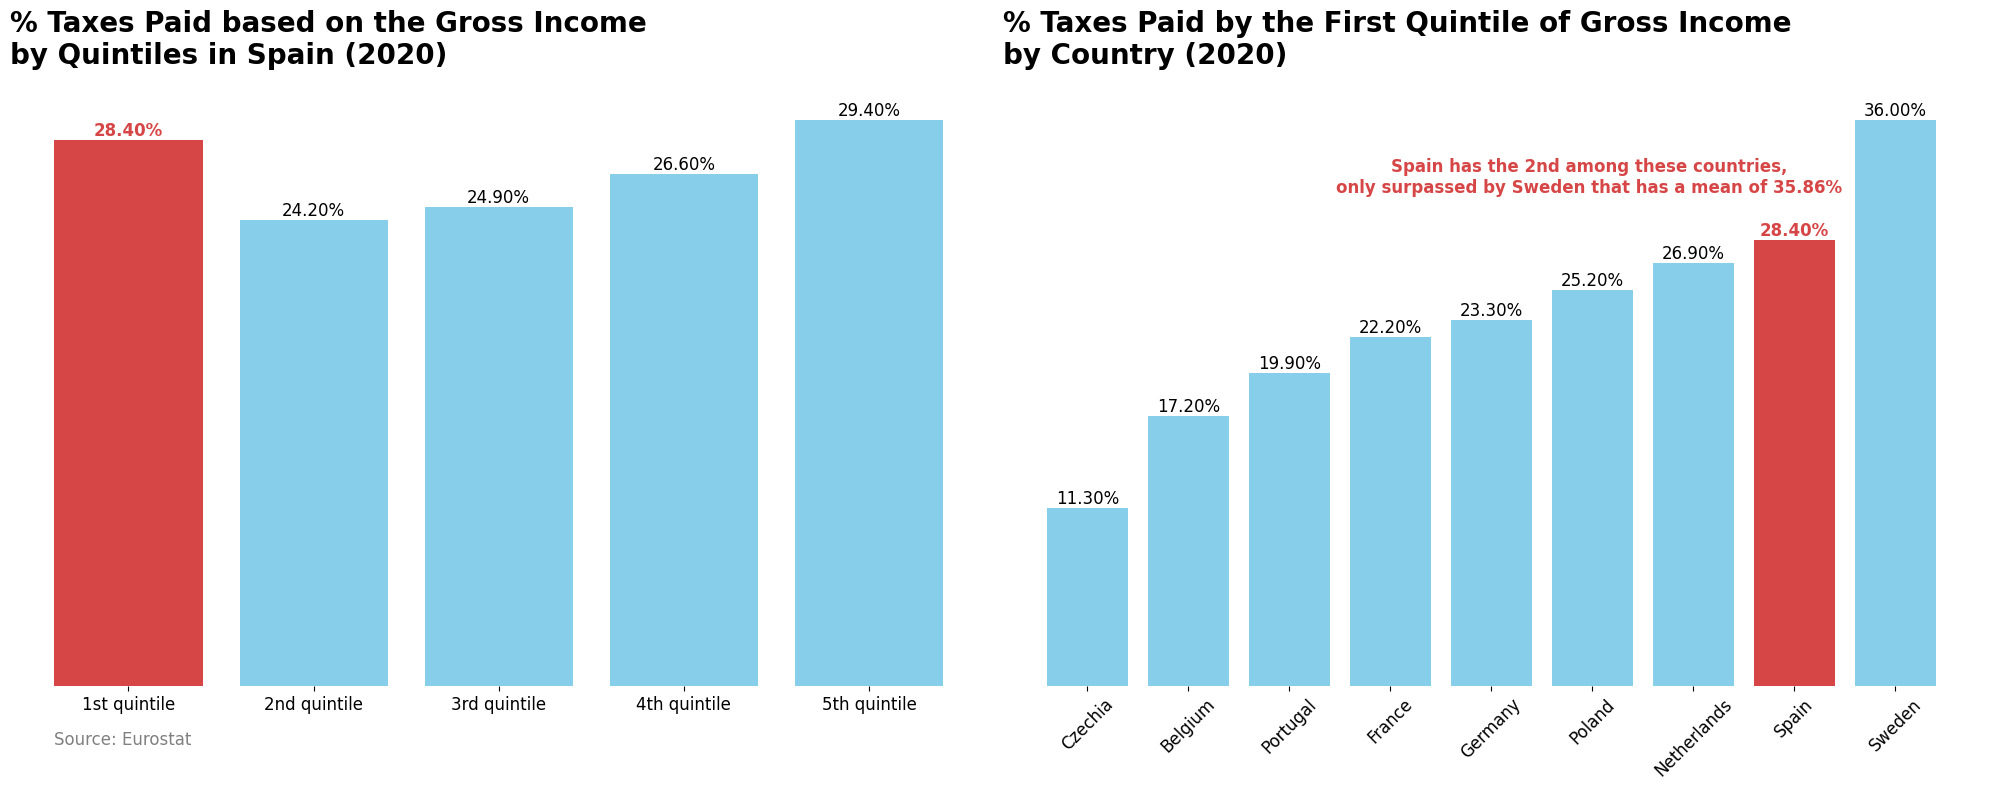

In [23]:
# Create a figure and a set of subplots with 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

#### 1st subplot ####

# Plot 'Income Quintile' as bar chart
bars1 = ax1.bar(taxes_distribution_Spain_df['Income Quintile'], taxes_distribution_Spain_df['Taxes%_gross_income (first quintile)'],
                # Highlight the first quintile
                color=['#d64646' if quintile == '1st quintile' else 'skyblue' for quintile in taxes_distribution_Spain_df['Income Quintile']], 
                label='Taxes% Gross Income')

# Add labels on each bar
for bar in bars1:
    height = bar.get_height()
    color = '#d64646' if bar.get_x() + bar.get_width() / 2 == 0 else 'black'
    fontweight = 'bold' if color == '#d64646' else 'normal'
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight=fontweight, color=color)

# Add labels and title
ax1.set_title('% Taxes Paid based on the Gross Income\nby Quintiles in Spain (2020)', fontsize=20, pad=20, fontweight='bold', loc='left')
ax1.set_xticklabels(taxes_distribution_Spain_df['Income Quintile'], ha='center', fontsize=12)

# Remove the frame around the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Source annotation
ax1.annotate('Source: Eurostat', xy=(0.045, -0.10), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Remove y-axis for the first subplot
ax1.get_yaxis().set_visible(False)

#### 2nd subplot ####

# Plot 'Taxes%_gross_income (first quintile)' as bar chart
bars2 = ax2.bar(taxes_distribution_EU_df['Country'], taxes_distribution_EU_df['Taxes%_gross_income (first quintile)'],
                # Highlight Spain
                color=['#d64646' if country == 'Spain' else 'skyblue' for country in taxes_distribution_EU_df['Country']], 
                label='Taxes% Gross Income (First Quintile)')

# Add labels on top of each bar
for bar in bars2:
    height = bar.get_height()
    country_name = taxes_distribution_EU_df.iloc[int(bar.get_x() + bar.get_width() / 2)].Country
    # Highligh Spain
    color = '#d64646' if country_name == 'Spain' else 'black'
    fontweight = 'bold' if color == '#d64646' else 'normal'
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight=fontweight, color=color)

# Add labels nad title
ax2.set_title('% Taxes Paid by the First Quintile of Gross Income\nby Country (2020)', fontsize=20, pad=20, fontweight='bold', loc='left')
ax2.set_xticklabels(taxes_distribution_EU_df['Country'], rotation=45, ha='center', fontsize=12)

# Explaining annotation
ax2.annotate(f'Spain has the 2nd among these countries,\nonly surpassed by Sweden that has a mean of {mean_sweden}%', xy=(0.60, 0.83), xycoords='axes fraction', ha='center', fontsize=12, color='#d64646', fontweight='bold')

# Remove y-axis
ax2.get_yaxis().set_visible(False)

# Remove the frame around the plot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

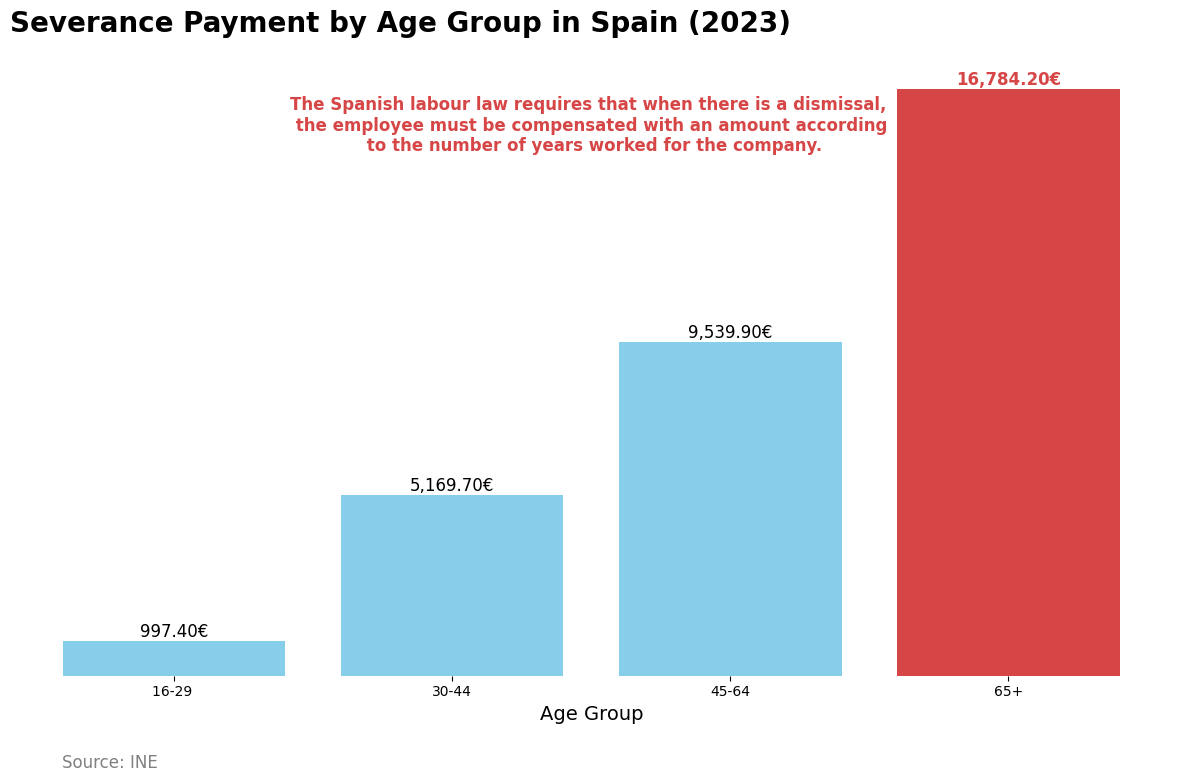

In [24]:
# Plot the severance payment
plt.figure(figsize=(15, 8))
bars = plt.bar(Spain_df['Age'], Spain_df['Severance_payment'], 
               color=['#d64646' if age == '65+' else 'skyblue' for age in Spain_df['Age']])

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    age_group = Spain_df.iloc[int(bar.get_x() + bar.get_width() / 2)].Age
    # Highligh the 65+
    color = '#d64646' if age_group == '65+' else 'black'
    fontweight = 'bold' if age_group == '65+' else 'normal'
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.2f}€', ha='center', va='bottom', fontsize=12, fontweight=fontweight, color=color)

# Add labels and title
plt.xlabel('Age Group', fontsize=14)
plt.title('Severance Payment by Age Group in Spain (2023)', fontsize=20, pad=20, fontweight='bold', loc='left')

# Source annotation
plt.annotate('Source: INE', xy=(0.045, -0.15), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Add annotation for explaining
plt.annotate('The Spanish labour law requires that when there is a dismissal, \n the employee must be compensated with an amount according \n to the number of years worked for the company.', 
             xy=(1.5, 15000), fontsize=12, fontweight='bold', color='#d64646', ha='center')

# Remove the frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove y-axis
plt.gca().get_yaxis().set_visible(False)

plt.show()

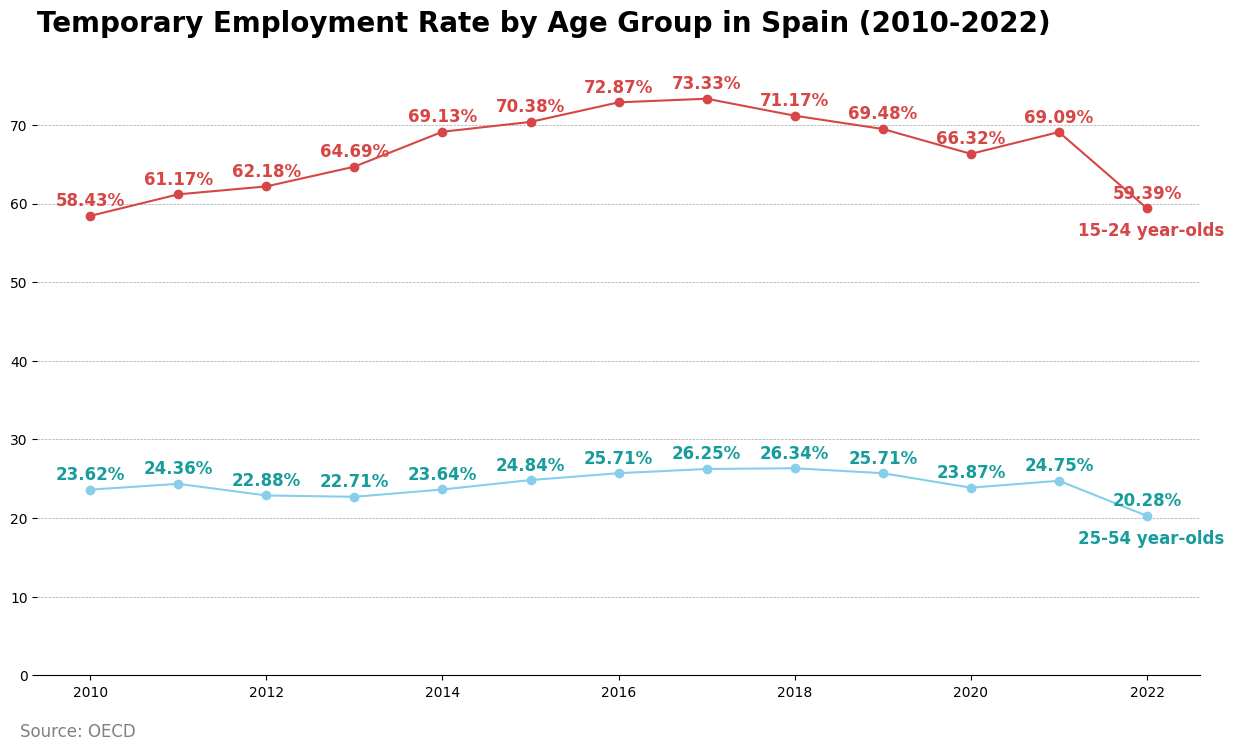

In [25]:
# Create subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the temporary rate as a line chart
for age_range, group in temporary_rate_spain_df.groupby('Age_range'):
    ax.plot(group['Year'], group['Temporary_rate_value'], marker='o', label=age_range, 
            color='#d64646' if age_range == '15-24 year-olds' else 'skyblue')

# Add labels on top of each point
for age_range, group in temporary_rate_spain_df.groupby('Age_range'):
    for i, row in group.iterrows():
        color = '#d64646' if age_range == '15-24 year-olds' else '#179C9C'
        ax.text(row['Year'], row['Temporary_rate_value'] + 0.75, f'{row["Temporary_rate_value"]:.2f}%', 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color=color)

# Title
ax.set_title('Temporary Employment Rate by Age Group in Spain (2010-2022)', fontsize=20, pad=20, fontweight='bold', loc='left')

# Add source annotation
ax.annotate('Source: OECD', xy=(-0.015, -0.1), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Add annotation at the end of each line indicating the age range
for age_range, group in temporary_rate_spain_df.groupby('Age_range'):
    ax.annotate(age_range, xy=(group['Year'].iloc[-1], group['Temporary_rate_value'].iloc[-1]), 
                xytext=(-50, -16), textcoords='offset points', ha='left', va='center', fontsize=12, fontweight='bold', 
                color='#d64646' if age_range == '15-24 year-olds' else '#179C9C')

# Set y-axis limit to start from 0
ax.set_ylim(0, max(temporary_rate_spain_df['Temporary_rate_value']) + 5)

# Add grid to y-axis
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Remove the frame around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

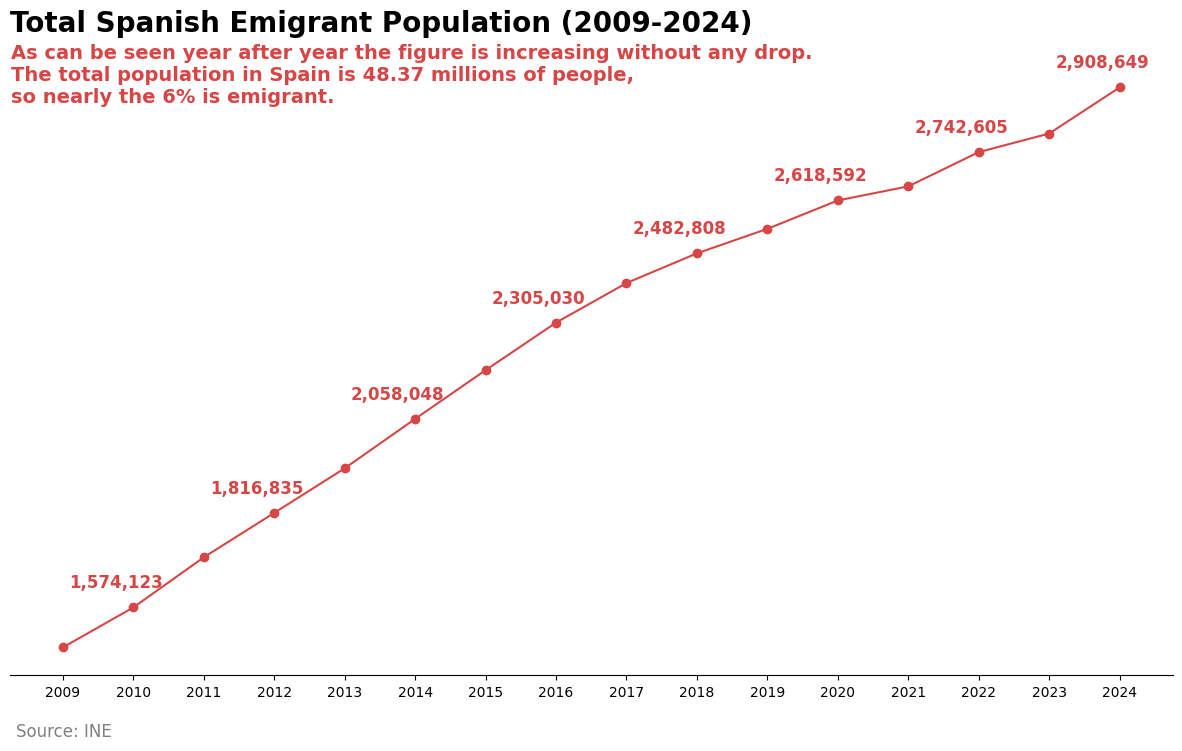

In [26]:
# Plot the total emigrants as a line chart
plt.figure(figsize=(15, 8))
plt.plot(timeline_emigrants_spain_df['Year'], timeline_emigrants_spain_df['Total_emigrants'], marker='o', color='#d64646')

# Add labels on the top of each even year point
for i, row in timeline_emigrants_spain_df.iterrows():
    if row['Year'] % 2 == 0:
        plt.text(row['Year'] - 0.25, row['Total_emigrants'] + 50000, f'{row["Total_emigrants"]:,}'.split('.')[0], fontsize=12, fontweight='bold', color='#d64646', ha='center')

# Ttitle
plt.title('Total Spanish Emigrant Population (2009-2024)', fontsize=20, pad=20, fontweight='bold', loc='left')

# Add source 
plt.annotate('Source: INE', xy=(0.005, -0.1), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Add annotation below the title
plt.annotate('As can be seen year after year the figure is increasing without any drop.\nThe total population in Spain is 48.37 millions of people, \nso nearly the 6% is emigrant.', 
             xy=(0.001, 0.93), xycoords='axes fraction', ha='left', fontsize=14, fontweight='bold', color='#d64646')

# Set x-axis ticks to show all years
plt.xticks(timeline_emigrants_spain_df['Year'])

# Remove the frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove y-axis
plt.gca().get_yaxis().set_visible(False)

plt.show()

In [27]:
# Calculate the Compound Annual Growth Rate (CAGR)
start_value = enor_hist_df['Close'].iloc[0]
end_value = enor_hist_df['Close'].iloc[-1]
num_years = (pd.to_datetime(enor_hist_df['Date'].iloc[-1]) - pd.to_datetime(enor_hist_df['Date'].iloc[0])).days / 365.25

CAGR_enor = (end_value / start_value) ** (1 / num_years) - 1
CAGR_enor

np.float64(0.0345070782451129)

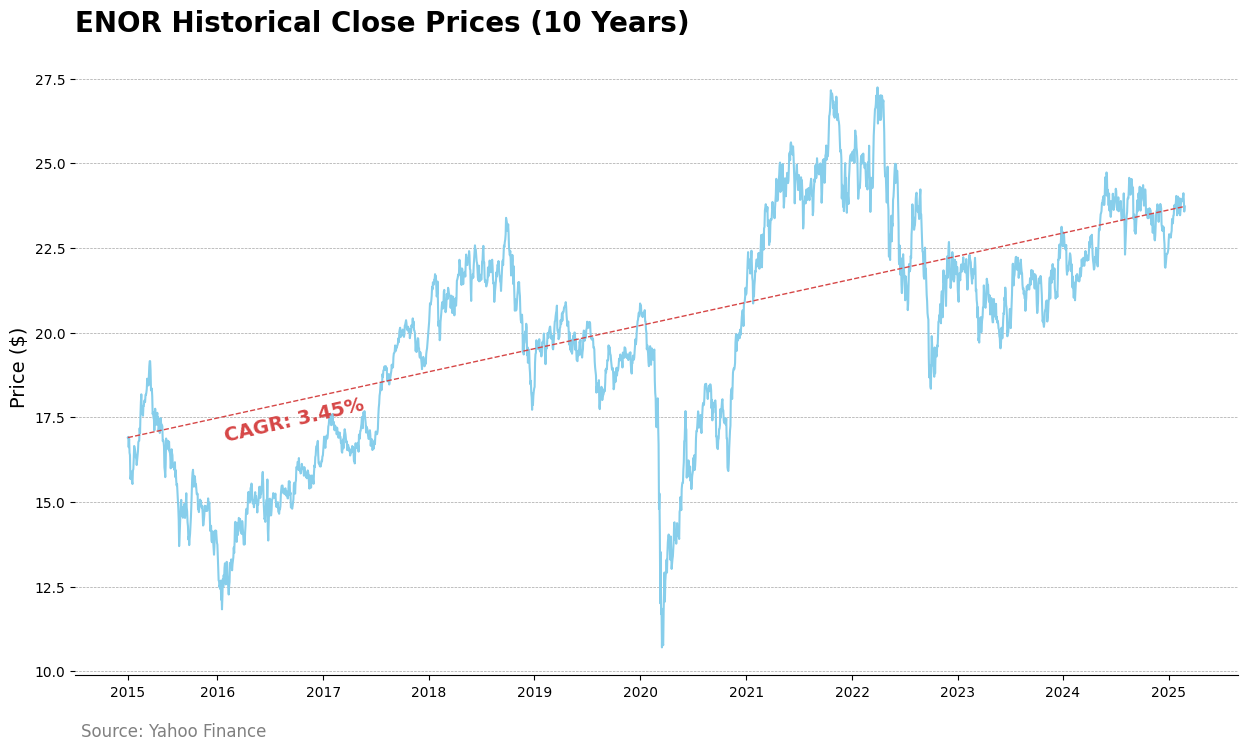

In [28]:
# Plot the timeline of the enor_hist_df
plt.figure(figsize=(15, 8))
plt.plot(enor_hist_df['Date'], enor_hist_df['Close'], color='skyblue')

# Add titles
plt.ylabel('Price ($)', fontsize=14)
plt.title('ENOR Historical Close Prices (10 Years)', fontsize=20, pad=20, fontweight='bold', loc='left')

# Add source annotation at the bottom left of the plot
plt.annotate('Source: Yahoo Finance', xy=(0.005, -0.1), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

# Add CAGR annotation
plt.annotate(f'CAGR: {CAGR_enor:.2%}', xy=(0.25, 0.38), xycoords='axes fraction', ha='right', fontsize=14, fontweight='bold', color='#d64646', rotation=13)

# Set x-axis ticks to show only the years
years = enor_hist_df['Date'].str[:4].unique()
plt.xticks([enor_hist_df[enor_hist_df['Date'].str.startswith(year)].index[0] for year in years], years)

# Add a line from the first to the last value
plt.plot([enor_hist_df['Date'].iloc[0], enor_hist_df['Date'].iloc[-1]], 
         [enor_hist_df['Close'].iloc[0], enor_hist_df['Close'].iloc[-1]], 
         color='#d64646', linestyle='--', linewidth=1)

# Add grid to y-axis
plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Remove the frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()